In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%tensorflow_version 1.x

In [ ]:
!sudo apt-get install unrar

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unrar is already the newest version (1:5.5.8-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains '.txt' and 'root' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))


title foo.txt, id 1ONV0xHyODEvFMmuQ8oxRXmHibEfE1H1E
title https://people..txt, id 1Ibj49w6IT7E-l-3bUQZRiYGZm3S5yWvF
title https://people..txt, id 1LrFL6ZKwCgBu1UVEcmwc2v9_LL94MIrp
title input.txt, id 0B-v0R2-Ojqj2NGRsVTRFeExyajQ
title ví dụ claisen.txt, id 0B-v0R2-Ojqj2cTdQWmRqLV9iRlU
title robinson.txt, id 0B-v0R2-Ojqj2aFRNWXg2eF9oRVU
title phản ứng hell-volhard-zelinsky (HVZ).txt, id 0B-v0R2-Ojqj2XzNVYWZLOVQ4SGM
title New Text Document (5).txt, id 0B-v0R2-Ojqj2VjByaWdMMEVkVFU
title phản ứng diels alder.txt, id 0B-v0R2-Ojqj2UXJJUEwzenBEQVE
title vittic.txt, id 0B-v0R2-Ojqj2REtVR3luZl9iVGM
title ngưng tụ claisen.txt, id 0B-v0R2-Ojqj2Q2dWR0xwTVlnTmM
title reformatsky.txt, id 0B-v0R2-Ojqj2N2s0aVdXS1RYcGM
title Nội dung hai.txt, id 0B-v0R2-Ojqj2NXdxWUt6TFZRMDA
title New Text Document (4).txt, id 0B-v0R2-Ojqj2ZnpVb0F0a19YMG8
title New Text Document (2).txt, id 0B-v0R2-Ojqj2dkNycllheWR5blE
title New Text Document (2)_5.txt, id 0B-v0R2-Ojqj2dTE4VEM1YVVBdWM
title E2coche.txt, id 0B-v0R2-Ojqj2

In [ ]:
!unrar x -Y  "/content/drive/MyDrive/train_data.rar" "/content/drive/MyDrive/train_data"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/train_data.rar

No files to extract


In [ ]:
!cp "/content/drive/My Drive/train_data.rar" "train_data.rar"

In [ ]:
!mkdir train_data

In [ ]:
!unrar x "/content/drive/My Drive/train_data.rar" "/content/train_data/"

Streaming output truncated to the last 5000 lines.
Extracting  /content/train_data/2020-12-09 16-27-28/4196.jpg              74%  OK 
Extracting  /content/train_data/2020-12-09 16-27-28/4197.jpg              74%  OK 
Extracting  /content/train_data/2020-12-09 16-27-28/4198.jpg              74%  OK 
Extracting  /content/train_data/2020-12-09 16-27-28/4199.jpg              74%  OK 
Extracting  /content/train_data/2020-12-09 16-27-28/42.jpg                74%  OK 
Extracting  /content/train_data/2020-12-09 16-27-28/420.jpg               74%  OK 
Extracting  /content/train_data/2020-12-09 16-27-28/4200.jpg              74%  OK 
Extracting  /content/train_data/2020-12-09 16-27-28/4201.jpg              74%  OK 
Extracting  /content/train_data/2020-12-09 16-27-28/4202.jpg              74%  OK 
Extracting  /content/train_data/2020-12-09 16-27-28/4203.jpg              74%  OK 
Extracting  /content/train_da

Using TensorFlow backend.


2020-12-09 16-25-48
2020-12-09 16-32-30
2020-12-09 16-15-52
2020-12-09 16-31-24
2020-12-09 16-23-16
2020-12-09 16-27-28
Total Images: 19574
Train samples: 15659
Validation samples: 3915
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_1 (Cropping2D)    (None, 90, 320, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 158, 24)       1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 77, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 37, 48)     

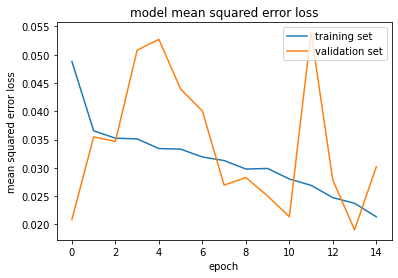

In [ ]:
#!/usr/bin/env python
"""
Steering angle prediction model

jay.urbain@gmail.com

"""
import cv2
import csv
import numpy as np
import os

import keras
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Lambda, Conv2D, Cropping2D, Dropout, ELU
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.regularizers import l2
from keras.optimizers import Adam
import time
import sklearn

import matplotlib.pyplot as plt


# basic net
def getModel(model="basicModel"):
    if model == "basicModel":
        return basicModel()
    elif model == "nVidiaModel":
        return nVidiaModel()
    elif model == "nVidiaModelRegularization":
        return nVidiaModelRegularization()
    elif model == "commaAiModel":
        return commaAiModel()
    elif model == "commaAiModelPrime":
        return commaAiModelPrime()

def basicModel(time_len=1):
    """
    Creates basic single layer autonomous car  model
    """
    model = Sequential()
    model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160, 320, 3)))
    model.add(Flatten(input_shape=(160,230,3)))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")
    return model

def preprocess(image):  # preprocess image
    import tensorflow as tf
    return tf.image.resize_images(image, (200, 66))
def newNvidia():
    model = Sequential()
    model.add(Cropping2D(cropping=((50,20), (0,0)), input_shape=(160,320,3)))
    model.add(Lambda(preprocess))
    model.add(Lambda(lambda x: (x/ 127.0 - 1.0)))
    model.add(Conv2D(filters=24, kernel_size=(5, 5), strides=(2, 2),activation='relu'))
    model.add(Conv2D(filters=36, kernel_size=(5, 5),strides=(2, 2), activation='relu'))
    model.add(Conv2D(filters=48, kernel_size=(5, 5), strides=(2, 2),activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3) ,activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    #model.add(Dense(units=1164, activation='relu'))
    model.add(Dense(units=100, activation='relu'))
    model.add(Dense(units=50, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    model.add(Dense(units=1))
    print(model.summary())
def nVidiaModel():
    """
    Creates nVidia autonomous car  model
    """
    model = Sequential()
    model.add(Lambda(lambda x: (x / 127) - 1, input_shape=(160,320,3)))
    model.add(Cropping2D(cropping=((50,20), (0,0))))
    model.add(Convolution2D(24,(5,5), strides=(2, 2), activation='relu'))
    model.add(Convolution2D(36,(5,5), strides=(2, 2), activation='relu'))
    model.add(Convolution2D(48,(5,5),strides=(2, 2),  activation='relu'))
    model.add(Convolution2D(64,(3,3), activation='relu'))
    model.add(Convolution2D(64,(3,3),activation='relu'))
    model.add(Flatten())
    model.add(Dense(100))
    model.add(Dense(50))
    model.add(Dense(10))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model

def nVidiaModelRegularization():
    """
    Creates nVidia autonomous car  model
    """
    model = Sequential()
    model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
    model.add(Cropping2D(cropping=((50,20), (0,0))))
    model.add(Conv2D(filters=24, kernel_size=(5, 5), strides=(2, 2),activation='relu'))
    model.add(Conv2D(filters=36, kernel_size=(5, 5),strides=(2, 2), activation='relu'))
    model.add(Conv2D(filters=48, kernel_size=(5, 5), strides=(2, 2),activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3) ,activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu'))

    model.add(Flatten())
    model.add(Dense(100))
    model.add(Dense(50))
    model.add(Dense(10))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    return model

def commaAiModel(time_len=1):
    """
    Creates comma.ai autonomous car  model
    Reduce dropout
    """
    model = Sequential()
    model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
    model.add(Cropping2D(cropping=((50,20), (0,0))))
    model.add(Convolution2D(16, 8, 8, subsample=(4, 4), border_mode="same"))
    model.add(ELU())
    model.add(Convolution2D(32, 5, 5, subsample=(2, 2), border_mode="same"))
    model.add(ELU())
    model.add(Convolution2D(64, 5, 5, subsample=(2, 2), border_mode="same"))
    model.add(Flatten())
    model.add(Dropout(.5))
    model.add(ELU())
    model.add(Dense(512))
    model.add(Dropout(.5))
    model.add(ELU())
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")
    return model


def commaAiModelPrime(time_len=1):
    """
    Creates comma.ai enhanced autonomous car  model
    Replace dropout with regularization
    Add 3 additional convolution layers
    """
    model = Sequential()
    model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
    model.add(Cropping2D(cropping=((50,20), (0,0))))

    # Add three 5x5 convolution layers (output depth 64, and 64)
    model.add(Convolution2D(16, 8, 8, subsample=(4, 4), border_mode="same", W_regularizer=l2(0.001)))
    model.add(ELU())
    model.add(Convolution2D(32, 5, 5, subsample=(2, 2), border_mode="same", W_regularizer=l2(0.001)))
    model.add(ELU())
    model.add(Convolution2D(48, 5, 5, subsample=(2, 2), border_mode="same", W_regularizer=l2(0.001)))
    model.add(ELU())

    # Add two 3x3 convolution layers (output depth 64, and 64)
    model.add(Convolution2D(64, 3, 3, border_mode='valid', W_regularizer=l2(0.001)))
    model.add(ELU())
    model.add(Convolution2D(64, 3, 3, border_mode='valid', W_regularizer=l2(0.001)))
    model.add(ELU())

    model.add(Flatten())

    # model.add(Dropout(.2))
    model.add(Dense(100, W_regularizer=l2(0.001)))
    model.add(ELU())

    # model.add(Dropout(0.50))
    model.add(Dense(50, W_regularizer=l2(0.001)))
    model.add(ELU())

    # model.add(Dropout(0.50))
    model.add(Dense(10, W_regularizer=l2(0.001)))
    model.add(ELU())

    model.add(Dense(1))

    # model.compile(optimizer="adam", loss="mse")
    model.compile(optimizer=Adam(lr=1e-4), loss='mse')

    return model


def getDrivingLogs(path, skipHeader=False):
    """
    Returns the lines from a driving log with base directory `dataPath`.
    If the file include headers, pass `skipHeader=True`.
    """
    lines = []
    with open(path + '/driving_log.csv') as csvFile:
        reader = csv.reader(csvFile)
        if skipHeader:
            next(reader, None)
        for line in reader:
            lines.append(line)
    return lines


def getImages(path):
    """
    Get all training images on the path `dataPath`.
    Returns `([centerPaths], [leftPath], [rightPath], [measurement])`
    """
    directories = [x[0] for x in os.walk(path)]
    dataDirectories = list(filter(lambda directory: os.path.isfile(directory + '/driving_log.csv'), directories))
    centerTotal = []
    leftTotal = []
    rightTotal = []
    measurementTotal = []
    for directory in dataDirectories:
        lines = getDrivingLogs(directory, skipHeader=True)
        center = []
        left = []
        right = []
        measurements = []
        for line in lines:
            measurements.append(float(line[3]))
            center.append(  line[0].strip())
            left.append( line[1].strip())
            right.append( line[2].strip())
        centerTotal.extend(center)
        leftTotal.extend(left)
        rightTotal.extend(right)
        measurementTotal.extend(measurements)

    return (centerTotal, leftTotal, rightTotal, measurementTotal)

def combineCenterLeftRightImages(center, left, right, measurement, correction):
    """
    Combine the image paths from `center`, `left` and `right` using the correction factor `correction`
    Returns ([imagePaths], [measurements])
    """
    imagePaths = []
    imagePaths.extend(center)
    imagePaths.extend(left)
    imagePaths.extend(right)
    measurements = []
    measurements.extend(measurement)
    measurements.extend([x + correction for x in measurement])
    measurements.extend([x - correction for x in measurement])
    return (imagePaths, measurements)

def generator(samples, batch_size=32):
    """
    Generate the required images and measurments for training/
    `samples` is a list of pairs (`imagePath`, `measurement`).
    """
    num_samples = len(samples)
    while 1: # Loop forever so the generator never terminates
        samples = sklearn.utils.shuffle(samples)
        for offset in range(0, num_samples, batch_size):
            batch_samples = samples[offset:offset+batch_size]

            images = []
            angles = []
            try:
                for imagePath, measurement in batch_samples:
                    
                    originalImage = cv2.imread(imagePath)
                    # print(imagePath)
                    image = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)
              
                    image = image[80:240,:,:]
                    images.append(image)
                    angles.append(measurement)
                    # Flipping
                    # images.append(cv2.flip(image,1))
                    # angles.append(measurement*-1.0)

                # trim image to only see section with road
                inputs = np.array(images)
                outputs = np.array(angles)
                yield (inputs, outputs)
            except Exception as e:
                print(e)
                print(imagePath)
import os

path = '/content/train_data/'

files = os.listdir(path)
num_image = []
angle_data = []
angle_image = []
samples = []
for file_name in files:
    if(file_name.find(".") == -1):
        print(file_name)
        
        try:
            file_data = open( "/content/train_data/" + file_name + '.txt') 
            for data in file_data.readlines():
            
                X = data.split(':')
                num_image.append(X[0])
                # print(data)
                angle_image.append(float(X[1].replace("\n","")))
                samples.append( ("/content/train_data/" +file_name +"/" + X[0] +".jpg", float(X[1].replace("\n",""))/125.0) )
                # print(float(X[1].replace("\n",""))/108)
        except Exception as e:
            print(e)

# Reading images locations.

print('Total Images: {}'.format( len(samples)))

# Splitting samples and creating generators.
from sklearn.model_selection import train_test_split
train_samples, validation_samples = train_test_split(samples, test_size=0.2)

print('Train samples: {}'.format(len(train_samples)))
print('Validation samples: {}'.format(len(validation_samples)))

train_generator = generator(train_samples, batch_size=64)
validation_generator = generator(validation_samples, batch_size=64)

# Model creatio
# model = getModel(model="nVidiaModel")
# model = getModel(model="commaAiModel")
model = getModel(model="nVidiaModelRegularization")
#model = getModel(model="basicModel")
model.summary()


filepath="weights-improvement-{epoch:02d}.h5"

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=filepath,
    save_weights_only=True,
    monitor="loss",
    mode="min",
    save_best_only=True,
 
)

# Train the model
callback = EarlyStopping(monitor='loss', patience=3)
history_object = model.fit_generator(train_generator, steps_per_epoch= \
                 len(train_samples)/64, validation_data=validation_generator, \
                 validation_steps=len(validation_samples)/64, epochs=15, verbose=1,callbacks=[callback,model_checkpoint_callback])


# history = model.fit(train_samples[:,0],train_samples[:,1], np.zeros(5),epochs=10, batch_size=1, callbacks=[callback], verbose=0)

# model.save('model_nVidia.h5')
# model.save('model_commaAiModel_e10.h5')
model.save('nVidiaModelRegularization_e5.h5')
#model.save('model_commaAiModelPrime_e20.h5')
# model.save('model_commaAiModelPrime_e5.h5')

print(history_object.history.keys())
print('Loss')
print(history_object.history['loss'])
print('Validation Loss')
print(history_object.history['val_loss'])



plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()


In [ ]:
ls

drive/                           weights-improvement-05.h5
nVidiaModelRegularization_e5.h5  weights-improvement-07.h5
sample_data/                     weights-improvement-08.h5
train_data/                      weights-improvement-10.h5
train_data.rar                   weights-improvement-11.h5
weights-improvement-01.h5        weights-improvement-12.h5
weights-improvement-02.h5        weights-improvement-13.h5
weights-improvement-03.h5        weights-improvement-14.h5
weights-improvement-04.h5        weights-improvement-15.h5


In [ ]:
model_path = "/content/nVidiaModelRegularization_e5.h5"
import os
import numpy as np
import cv2
num_image = []
angle_data = []
angle_image = []
samples = []

WIN_MARGIN_LEFT = 240
WIN_MARGIN_TOP = 240
WIN_MARGIN_BETWEEN = 180
WIN_WIDTH = 480


from keras.models import load_model
import h5py

f = h5py.File(model_path, mode='r')
model_version = f.attrs.get('keras_version')




model = load_model(model_path)


cv2.namedWindow("Steering Wheel", cv2.WINDOW_NORMAL)
cv2.moveWindow("Steering Wheel", WIN_MARGIN_LEFT, WIN_MARGIN_TOP)


cv2.namedWindow("Steering Wheel1", cv2.WINDOW_NORMAL)
cv2.moveWindow("Steering Wheel1", WIN_MARGIN_LEFT, WIN_MARGIN_TOP)

img = cv2.imread("wheel.jpg", 0)
rows,cols = img.shape
smoothed_angle = 0
smoothed_angle1 = 0
a_max = -100
a_min = 100
angle = 0
steering_angle = []
for file_name in files:
    if(file_name.find(".") == -1):
        print(file_name)
        
        try:
            file_data = open( file_name + '.txt') 
            for data in file_data.readlines():
            
                X = data.split(':')
                num_image.append(X[0])

                # print(data)
                
                if(a_max < float(X[1].replace("\n",""))):
                    a_max = float(X[1].replace("\n",""))
                if(a_min > float(X[1].replace("\n",""))):
                    a_min = float(X[1].replace("\n",""))
                samples.append( ("./" +file_name +"/" + X[0] +".jpg", float(X[1].replace("\n",""))) )
                imagePath = "./" +file_name +"/" + X[0] +".jpg"
                image = cv2.imread(imagePath)
                # print(imagePath)
                # image = cv2.cvtColor(originalImage, cv2.COLOR_BGR2RGB)
                angle_image.append(float(X[1].replace("\n","")))
                # print(image.shape)
                image = image[80:240,:,:]
                angle = float(model.predict(image[None, :, :, :], batch_size=1))
                steering_angle.append(angle)
                print(angle  )
                # cv2.imshow("", image)
  
               
                degrees = float(X[1].replace("\n","")) +0.0001
          
             

                # make smooth angle transitions by turning the steering wheel based on the difference of the current angle
                # and the predicted angle
                # smoothed_angle += 0.2 * pow(abs((degrees - smoothed_angle)), 2.0 / 3.0) * (degrees - smoothed_angle) / abs(degrees - smoothed_angle)
                # M = cv2.getRotationMatrix2D((cols/2,rows/2), -smoothed_angle, 1)
                # dst = cv2.warpAffine(img,M,(cols,rows))
                # cv2.imshow("Steering Wheel", dst)

                # smoothed_angle1 += 0.2 * pow(abs((angle*255 - smoothed_angle1)), 2.0 / 3.0) * (angle*255 - smoothed_angle1) / abs(angle*255 - smoothed_angle1)
                # M = cv2.getRotationMatrix2D((cols/2,rows/2), -smoothed_angle1, 1)
                # dst = cv2.warpAffine(img,M,(cols,rows))
                # cv2.imshow("Steering Wheel1", dst)
                # sleep(0.001)
                # if cv2.waitKey(1) == ord('q'):
                #     break
        except Exception as e:
            print(e)
steering_angle = np.array(steering_angle)
angle_image = np.array(angle_image)

print(((steering_angle - angle_image)).mean(axis=None))
print(a_max)
print(a_min)